In [112]:
import pandas as pd
import numpy as np
df = pd.read_csv("Churn_Modelling.csv")
df.head()
df.describe()
df.info()
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age

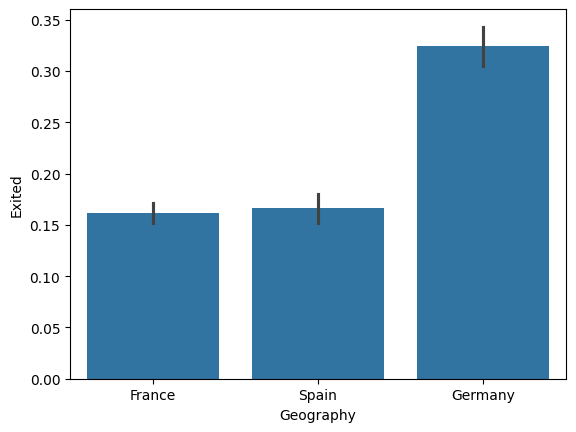

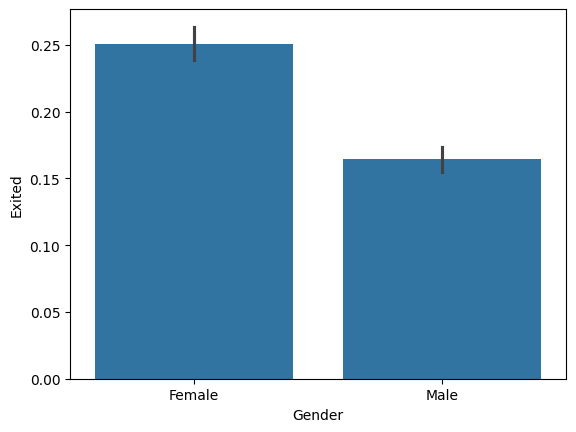

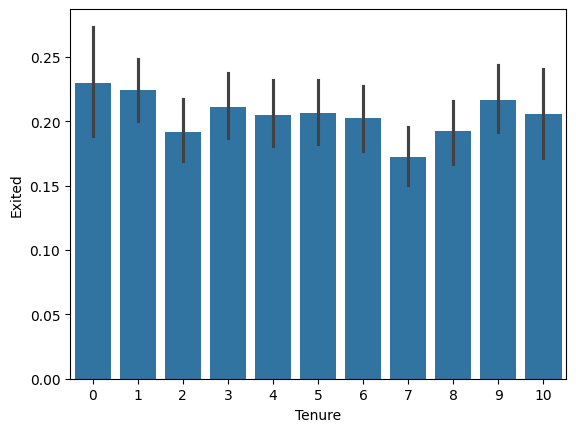

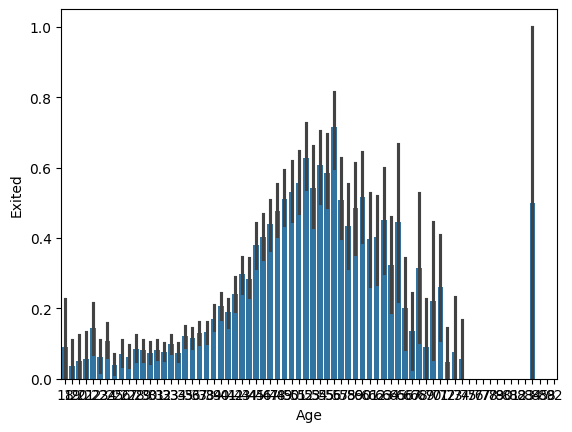

In [113]:
# prompt: generate a plot for "Exited" with "geography"

import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x = "Geography", y = "Exited", data = df)
plt.show()
sns.barplot(x = "Gender", y = "Exited", data = df)
plt.show()
sns.barplot(x = "Tenure", y = "Exited", data = df)
plt.show()
sns.barplot(x = "Age", y = "Exited", data = df)
plt.show()

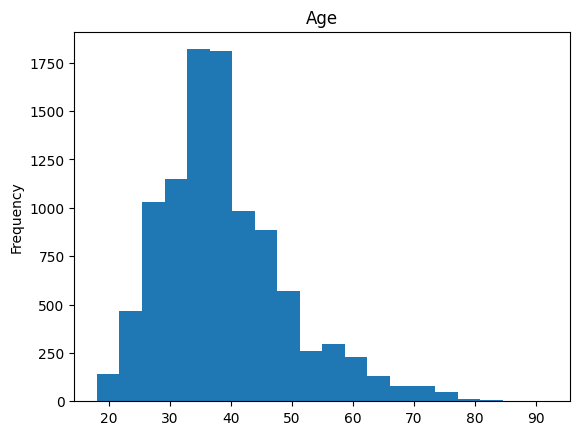

In [114]:
from matplotlib import pyplot as plt
df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(True)

In [115]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [116]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [117]:
print(df['NumOfProducts'].max())
print(df['Age'].max())
print(df['Balance'].max())
print(df['CreditScore'].max())
df['Tenure'].max()

4
92
250898.09
850


10

In [129]:
import re
from sklearn.preprocessing import LabelEncoder
def clean_data(df):
    # Remove special symbols from all columns
    df_cleaned = df.replace(r'[^a-zA-Z0-9 ]', '', regex=True)  # Create a copy of df



    for col in df_cleaned.select_dtypes(include=['object']).columns:
      df_cleaned[col] = df_cleaned[col].str.lower()
      df_cleaned[col] = df_cleaned[col].apply(lambda x: re.sub(r'(https?://\S+|www\.\S+|\S+@\S+)', '', x))
      df_cleaned[col] = df_cleaned[col].str.replace('\s+', ' ')
      df_cleaned[col] = df_cleaned[col].str.strip()

    # Replace non-integer values in integer columns with 0
    for col in df_cleaned.select_dtypes(include=['int']).columns:
        df_cleaned[col] = df_cleaned[col].apply(lambda x: 0 if not str(x).isdigit() else x)

    le = LabelEncoder()
    for col in df_cleaned.select_dtypes(include=['object']).columns:
        df_cleaned[col] = le.fit_transform(df_cleaned[col])


    return df_cleaned

df_cleaned = clean_data(df) # Clean a copy of the DataFrame
print(df_cleaned.head())
print(df_cleaned.columns)
print(df_cleaned.info())
df_cleaned

   CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619          0       0   42       2       0.00              1   
1          608          2       0   41       1   83807.86              1   
2          502          0       0   42       8  159660.80              3   
3          699          0       0   39       1       0.00              2   
4          850          2       0   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0  
Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')
<class 'pandas.core.

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [173]:
from sklearn.model_selection import train_test_split
x = df_cleaned.drop('Exited', axis=1)
y = df_cleaned['Exited']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=None)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7000, 10)
(3000, 10)
(7000,)
(3000,)


In [174]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [175]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("accuracy percentage", accuracy*100,"%")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.794
accuracy percentage 79.4 %
              precision    recall  f1-score   support

           0       0.80      0.98      0.88      2393
           1       0.43      0.05      0.10       607

    accuracy                           0.79      3000
   macro avg       0.62      0.52      0.49      3000
weighted avg       0.73      0.79      0.72      3000

[[2349   44]
 [ 574   33]]


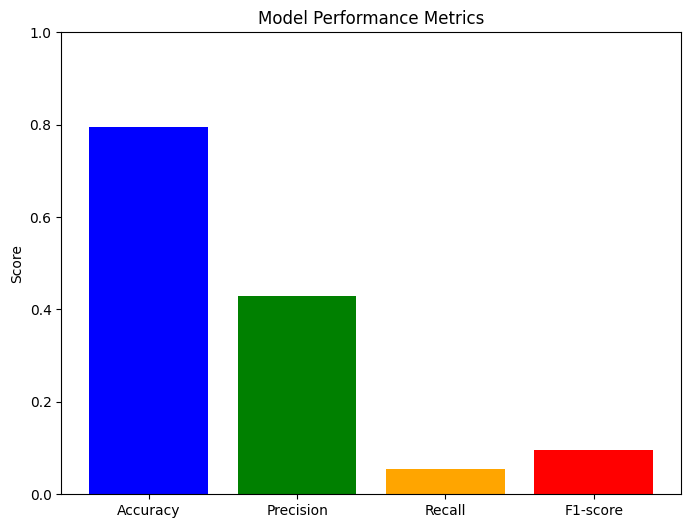

In [176]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# ... (Your logistic regression code, including prediction and evaluation) ...

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Create bar chart
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.ylim([0, 1])  # Set y-axis limits to 0-1 for easy comparison
plt.ylabel('Score')
plt.title('Model Performance Metrics')
plt.show()